<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [2]:
import numpy as np
import pandas as pd
import os
import sys

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

plt.style.use('bmh')

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from matplotlib.ticker import MultipleLocator,  AutoMinorLocator

In [52]:
def decomposition_plot(ts):
    df_decomposed = seasonal_decompose(ts, model='additive')

    fig1, axs = plt.subplots(4,1, figsize=(20,16))
    
    ml = MultipleLocator(30)
    ts.plot(ax=axs[0], ylabel='Original')
    df_decomposed.trend.plot(ax=axs[1], ylabel='Trend')
    df_decomposed.seasonal.plot(ax=axs[2], ylabel='Seasonal')
    df_decomposed.resid.plot(ax=axs[3], ylabel='Residual')

    fig1.suptitle('Decomposition Plot', fontsize=16, y=1.0)
    
    for i in range(4):

        #axs[i].xaxis.set_minor_locator(AutoMinorLocator(n=12))
        #axs[i].xaxis.set_minor_locator(mdates.MonthLocator())
        axs[i].xaxis.grid(which="minor", color='k', linestyle='-.', linewidth=0.5)
        axs[i].xaxis.grid(which="major", color='k', linestyle='-.', linewidth=1.5)

        axs[i].xaxis.set_minor_formatter(mdates.DateFormatter('%Y-%b'))
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))

        for label in axs[i].get_xticklabels(which='minor'):
            label.set(rotation=30, horizontalalignment='right')

        for label in axs[i].get_xticklabels(which='major'):
            label.set(rotation=30, horizontalalignment='right')
    
    plt.tight_layout()
    plt.show()

In [4]:
# getting the name of the directory
# where the this file is present.
current = os.path.dirname(os.path.abspath("__file__"))

# Getting the parent directory name
# where the current directory is present.
parent = os.path.dirname(current)

# Getting the parent directory name
gr_parent = os.path.dirname(parent)

# adding the parent directory to
# the sys.path.
sys.path.append(gr_parent)

sys.path.insert(0, "..//skk_analytics")

In [5]:
from connection import *
from utils import *

In [6]:
file_config = gr_parent + "\\database.ini"
print(file_config)

sql_file = os.path.join(parent, 'sql\\lng_prod_tangguh_data_query.sql')
print(sql_file)

D:\Users\kusumy\Documents\Code\Python\skk\skk_analytics\database.ini
D:\Users\kusumy\Documents\Code\Python\skk\skk_analytics\gas_prod\sql\lng_prod_tangguh_data_query.sql


In [7]:
conn = create_db_connection(filename=file_config, section='postgresql_ml_lng_skk')
if conn == None:
    exit()

#Load Data from Database
query_1 = open(sql_file, mode="rt").read()
data = get_sql_data(query_1, conn)

data['date'] = pd.DatetimeIndex(data['date'], freq='D')
data = data.reset_index()

D:\Users\kusumy\Documents\Code\Python\skk\skk_analytics\connection.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(sql, conn)


In [8]:
ds = 'date'
y = 'lng_production' 

df = data[[ds,y]]
df = df.set_index(ds)
df.index = pd.DatetimeIndex(df.index, freq='D')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 987 entries, 2020-01-01 to 2022-09-13
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lng_production  987 non-null    float64
dtypes: float64(1)
memory usage: 15.4 KB


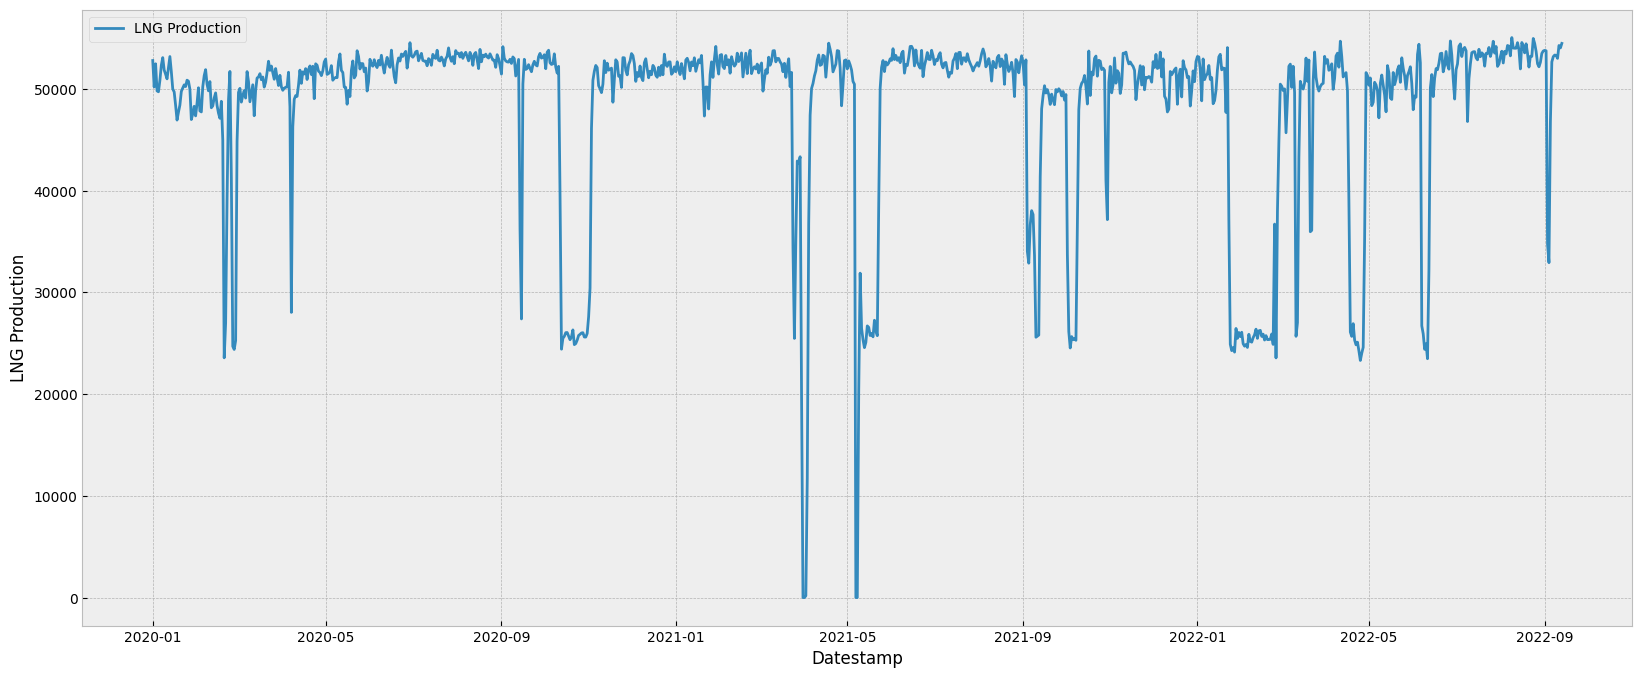

In [10]:
fig1, ax = plt.subplots(figsize=(20,8))
ax.plot(df, label='LNG Production')
ax.set_ylabel("LNG Production")
ax.set_xlabel("Datestamp")
ax.legend(loc='best')
plt.show()

In [ ]:
df_decomposed = seasonal_decompose(df, model='additive')
plt.rcParams.update({'figure.figsize': (20, 15)})
fig = df_decomposed.plot().suptitle('Decomposition Plot')
plt.tight_layout()
plt.show()

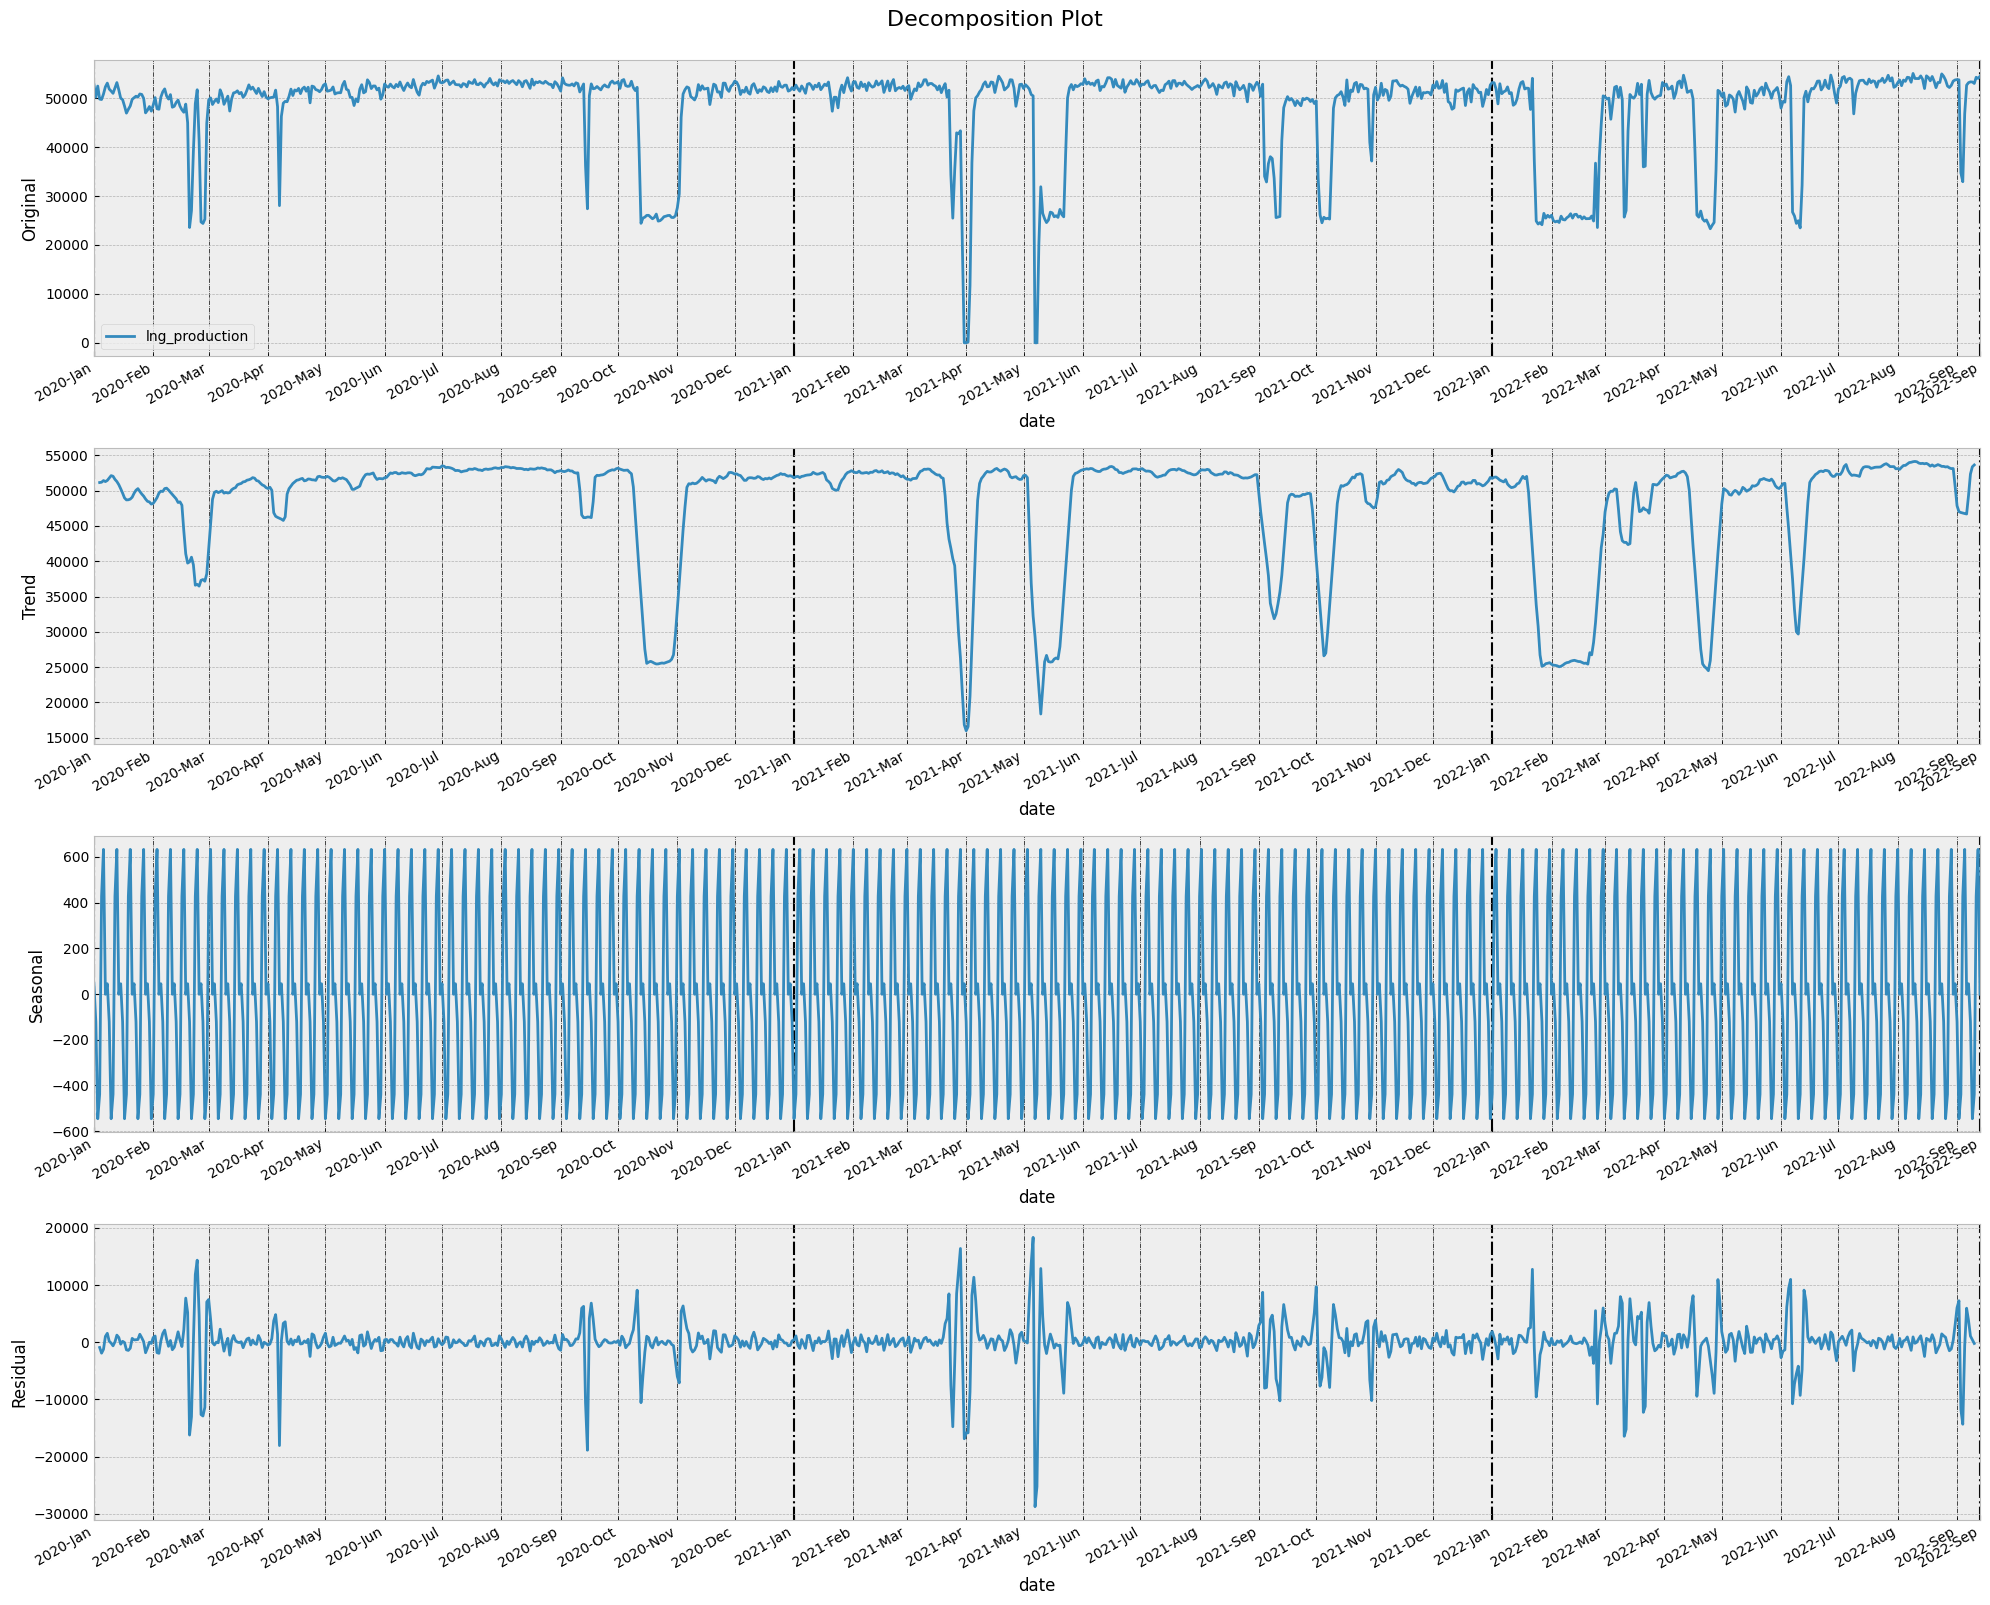

In [59]:
decomposition_plot(df)

In [14]:
sql_file2 = os.path.join(parent, 'sql\\lng_prod_badak_data_query.sql')
print(sql_file2)

D:\Users\kusumy\Documents\Code\Python\skk\skk_analytics\gas_prod\sql\lng_prod_badak_data_query.sql


In [17]:
#Load Data from Database
query_2 = open(sql_file2, mode="rt").read()
data2 = get_sql_data(query_2, conn)

data2['date'] = pd.DatetimeIndex(data2['date'], freq='D')
data2 = data2.reset_index()

D:\Users\kusumy\Documents\Code\Python\skk\skk_analytics\connection.py:50: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(sql, conn)


In [18]:
data2.head()

,index,date,lng_production,fg_exog
0,0,2013-01-01,60876.0,1647.606
1,1,2013-01-02,60412.0,1639.216
2,2,2013-01-03,61192.0,1626.813
3,3,2013-01-04,59777.0,1607.648
4,4,2013-01-05,59948.0,1629.828


In [20]:
df2 = data2[[ds,y]]
df2 = df2.set_index(ds)
df2.index = pd.DatetimeIndex(df2.index, freq='D')
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3601 entries, 2013-01-01 to 2022-11-10
Freq: D
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lng_production  3601 non-null   float64
dtypes: float64(1)
memory usage: 56.3 KB


In [56]:
df2 = df2.loc['2019-01-01':'2022-12-31']

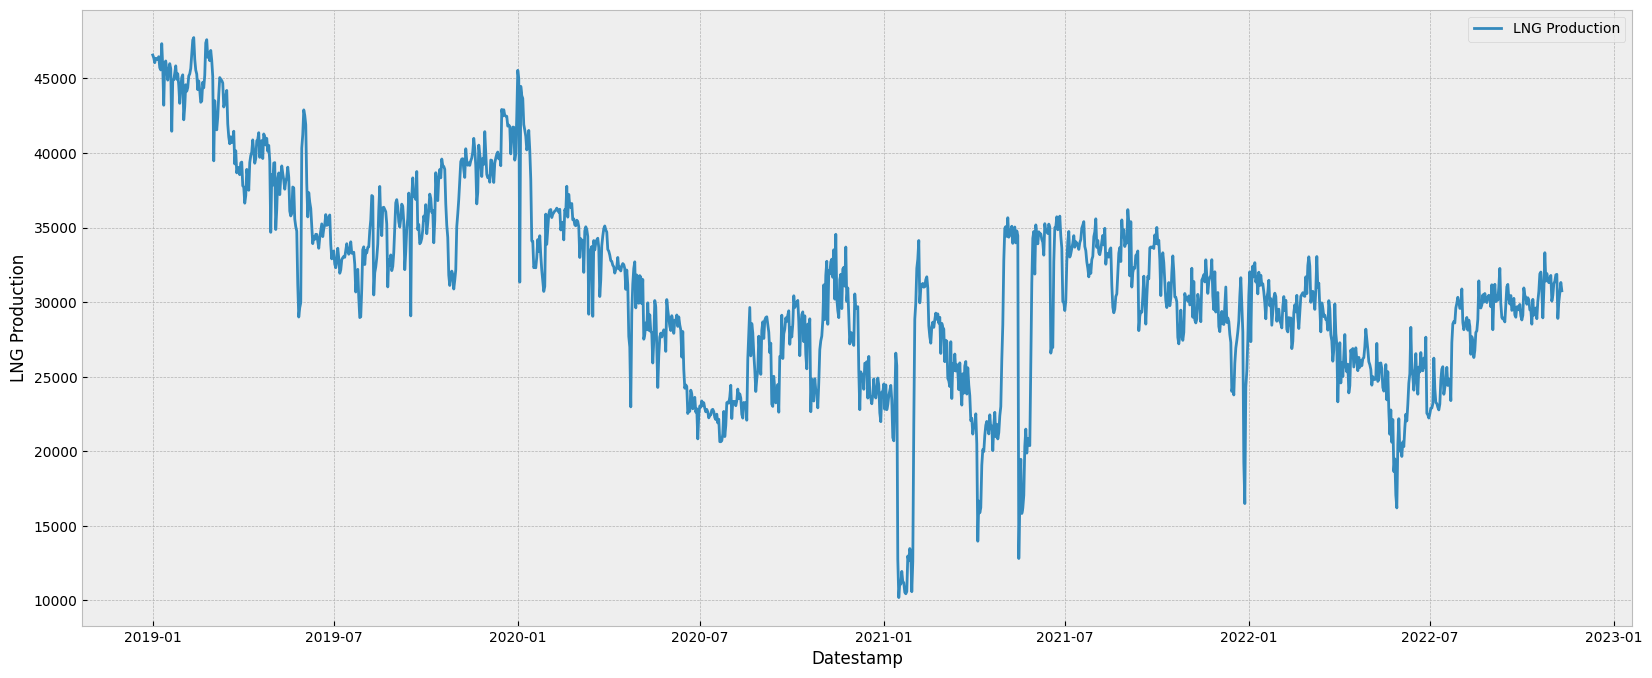

In [57]:
fig1, ax = plt.subplots(figsize=(20,8))
ax.plot(df2, label='LNG Production')
ax.set_ylabel("LNG Production")
ax.set_xlabel("Datestamp")
ax.legend(loc='best')
plt.show()

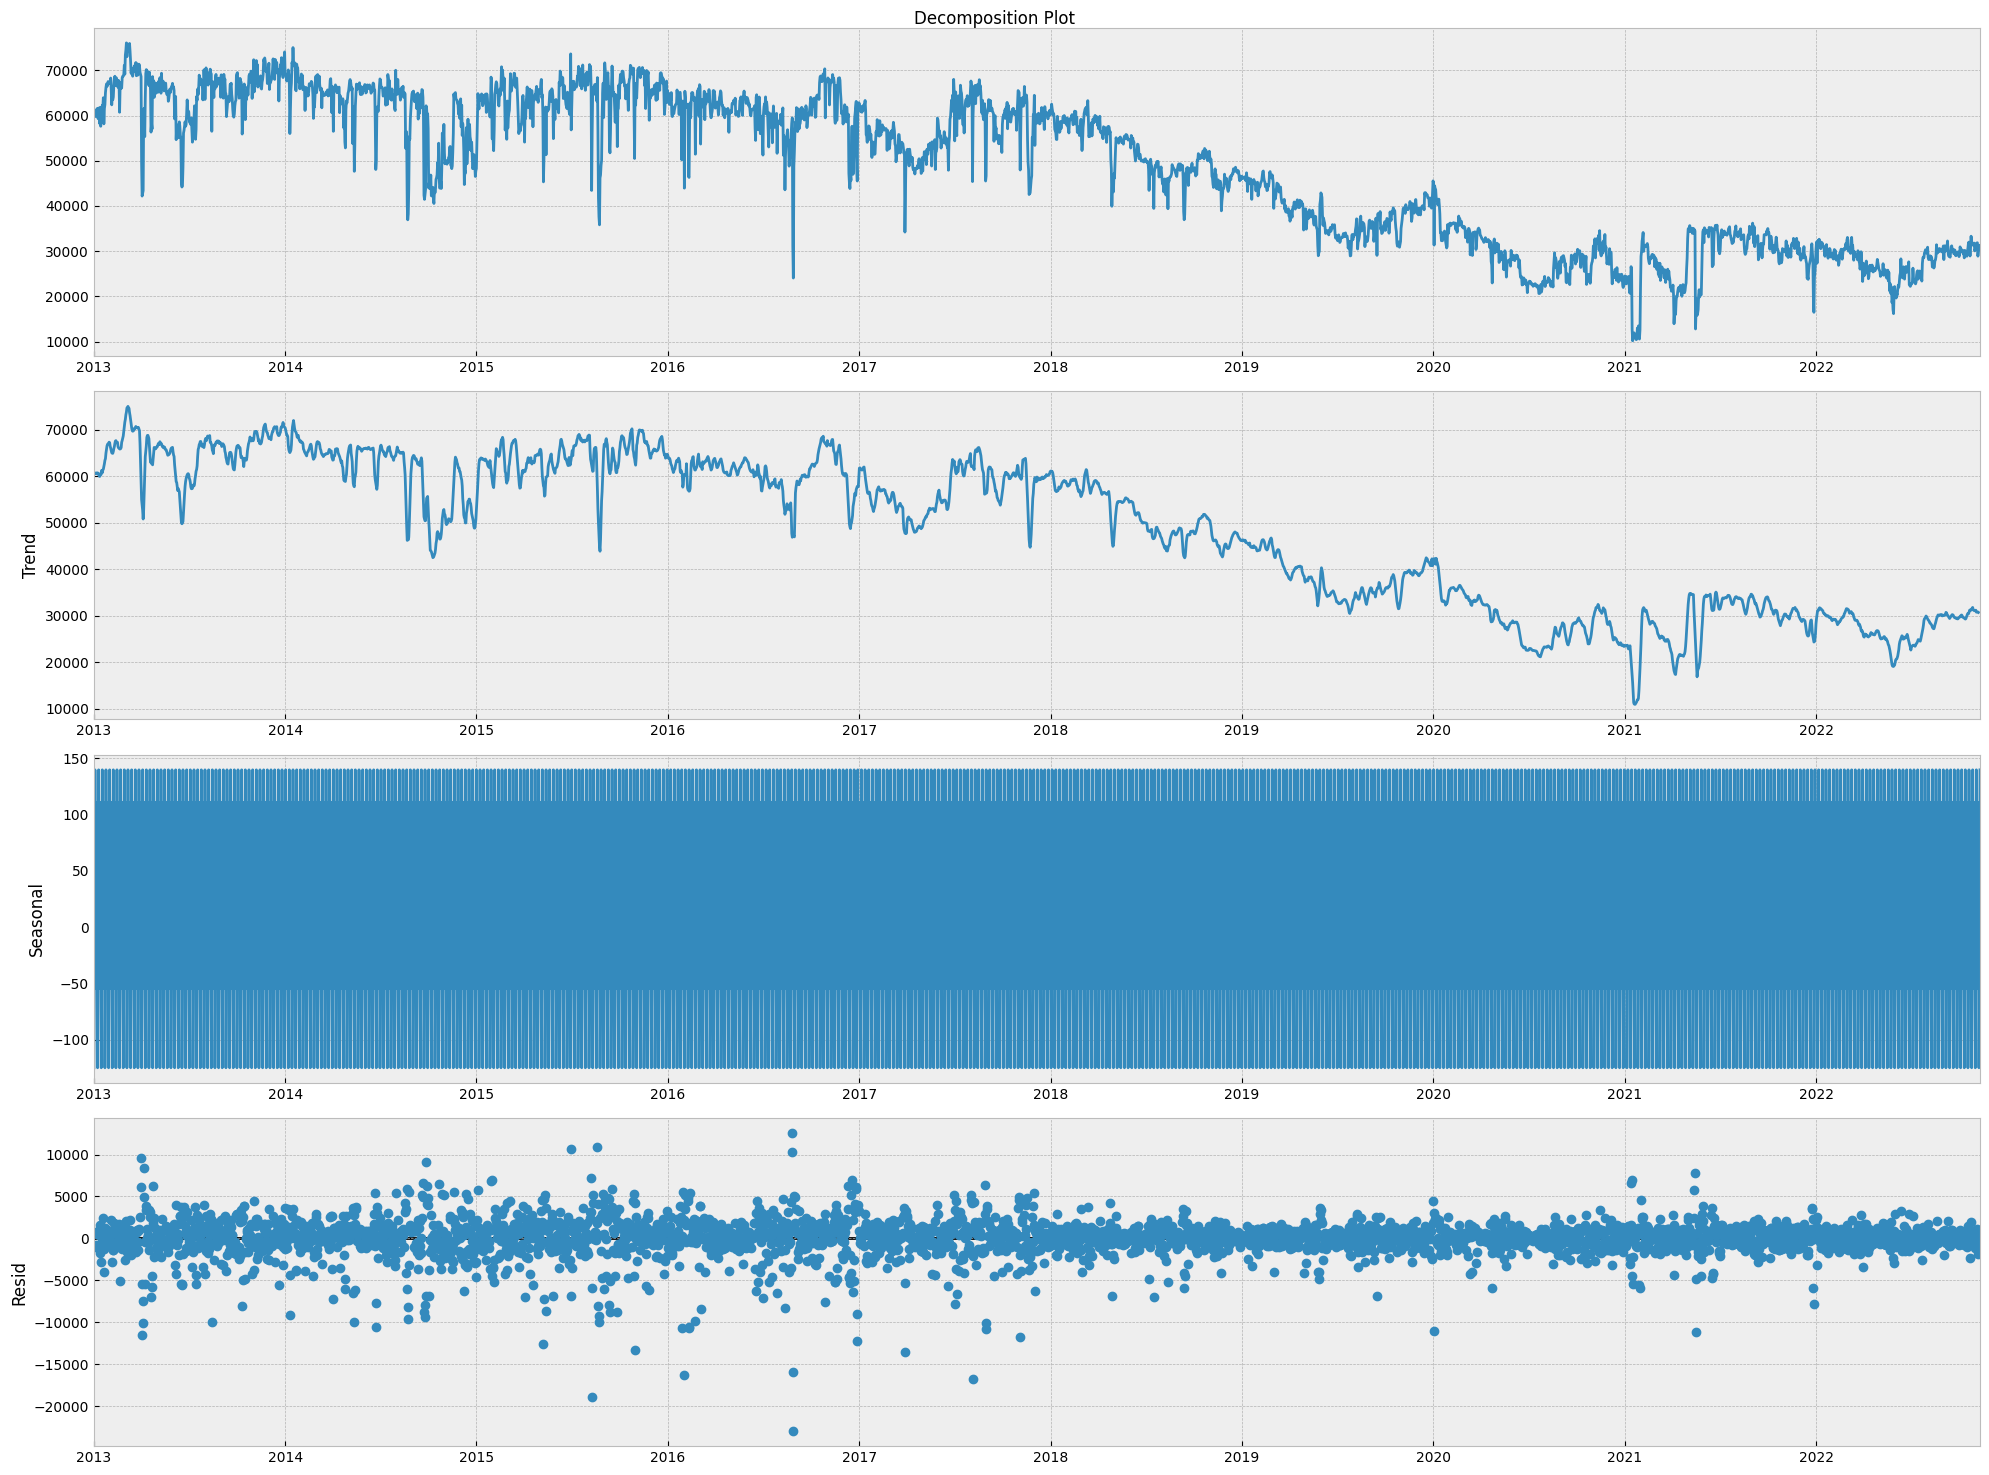

In [24]:
df2_decomposed = seasonal_decompose(df2, model='additive')
plt.rcParams.update({'figure.figsize': (20, 15)})
fig = df2_decomposed.plot().suptitle('Decomposition Plot')
plt.tight_layout()
plt.show()

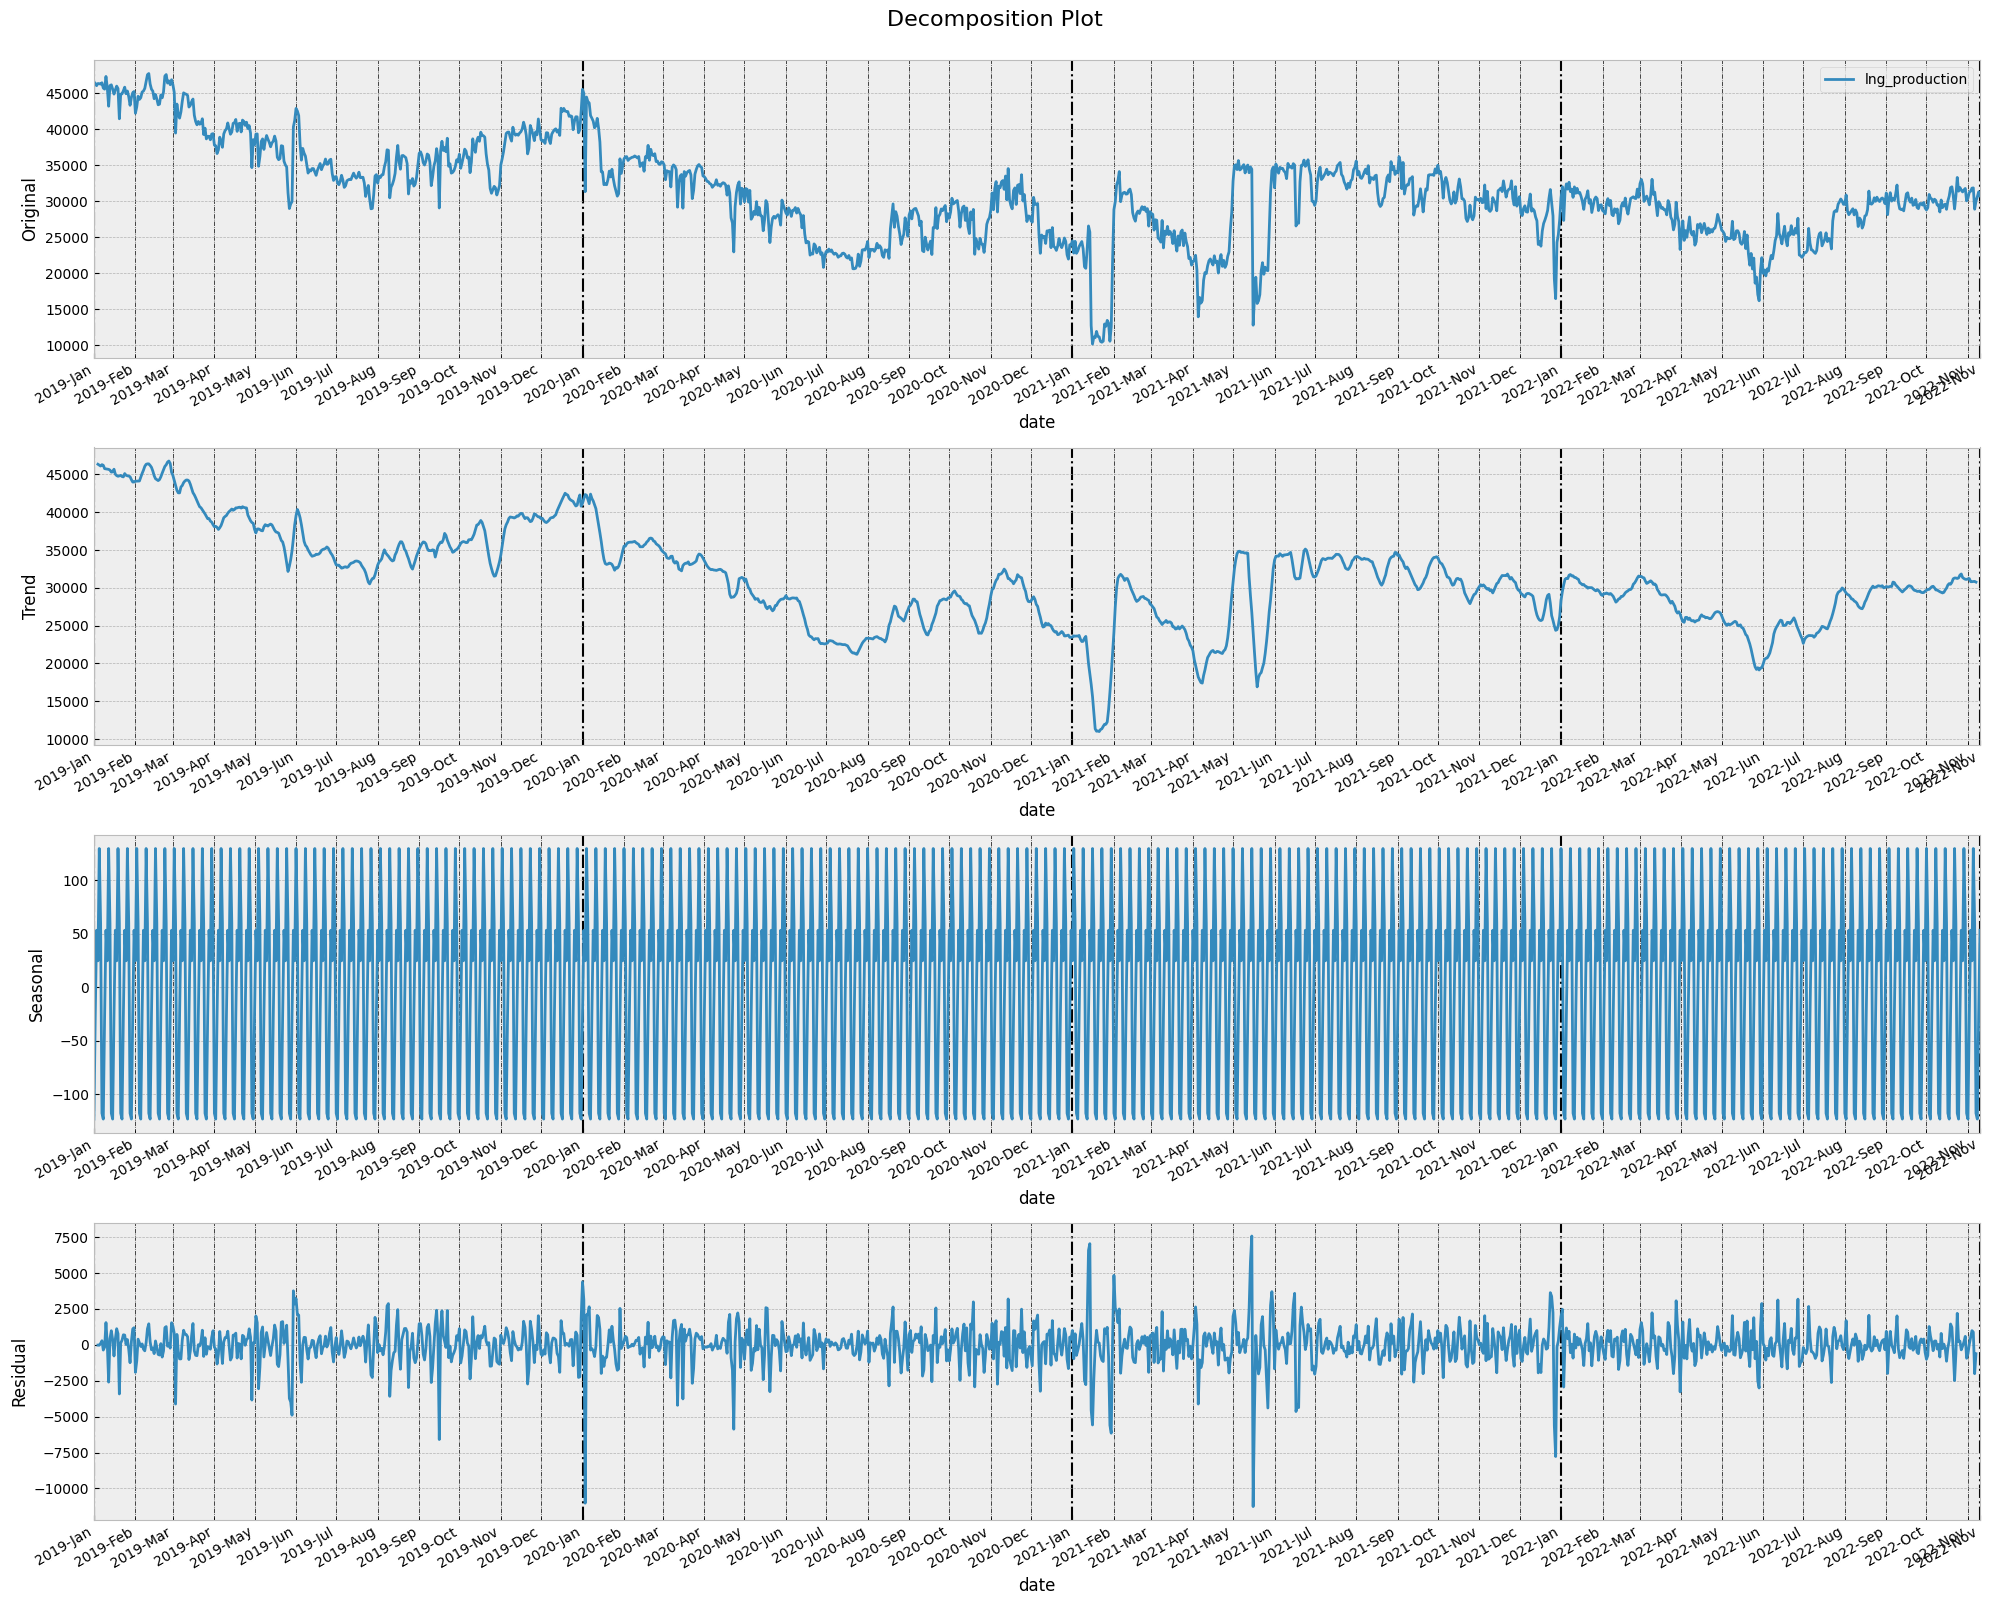

In [58]:
decomposition_plot(df2)